# Matplotlib绘图使用总结

本notebook主要分为两部分，
- 第一部分将绘图中经常用的属性做了汇总，包括轴刻度标题的添加、中文字体的显示等等。    
- 第二部分将经常使用的图做了总结，包括散点图，折线图，柱形图，直方图，饼图等。

> 下面总结部分统一使用`plt.subplots()`的方式创建画布，通过axes进行图的绘制

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # 导入绘图的包

## 1. 常用的绘图属性

### 1.1 图像画布的设计
画布是通过`plt.subplots()`创建，具体的API使用参考[官网API文档](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html)。

经常使用到的两个属性便是指定`nrows`、`ncols`（子图的个数和分布）和`figsize`（画布大小）

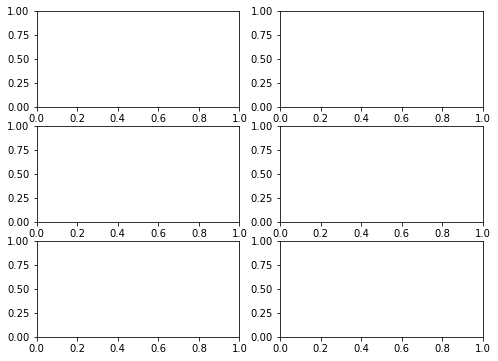

In [2]:
# 创建一个画布，大小为8×6，其中包含6个子图，分布为3×2,效果如下，
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))

plt.show() 

### 1.2 图像主题的设计

matplotlib中默认带了很多可用的风格，可以通过`plt.style.available`查看。

In [3]:
plt.style.available

['tableau-colorblind10',
 'seaborn-poster',
 'Solarize_Light2',
 'bmh',
 'seaborn-deep',
 'fast',
 'seaborn-whitegrid',
 'fivethirtyeight',
 'seaborn-bright',
 'seaborn-notebook',
 'seaborn-talk',
 'seaborn',
 'seaborn-pastel',
 'seaborn-darkgrid',
 'ggplot',
 'grayscale',
 'dark_background',
 'classic',
 'seaborn-muted',
 'seaborn-ticks',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-paper',
 'seaborn-dark-palette',
 'seaborn-white',
 '_classic_test']

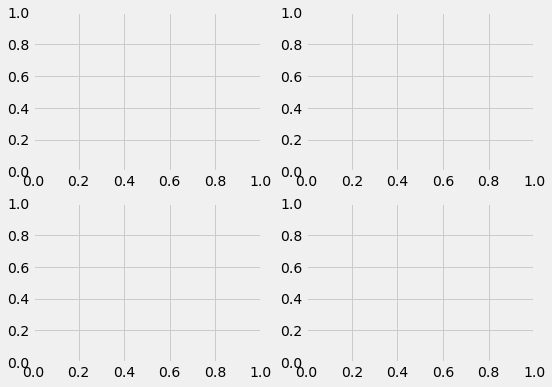

In [4]:
plt.style.use("fivethirtyeight")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

plt.show() 

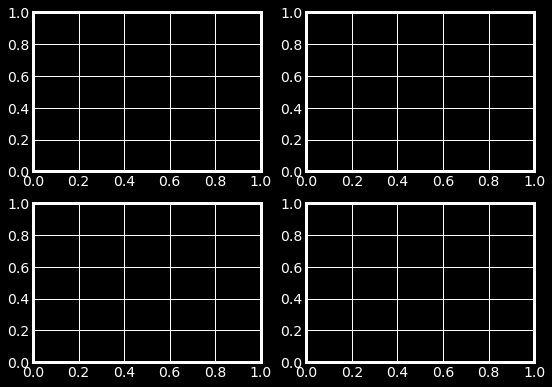

In [5]:
plt.style.use("dark_background")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

plt.show() 

### 1.3 图例标题

主要是给x轴或者y轴添加名称，给线添加名称，为整个图像添加题目,
- `axes.set_xlabel`是为x轴添加名称，其[官网API](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html)
- `axes.set_ylabel`是为y轴添加标题，其[官方API](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html)
- `axes.set_title`是为整幅图像添加标题，其[官方API](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html)
- `axes.legend`是为图像中的线添加标题，其[官方API](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.legend.html)

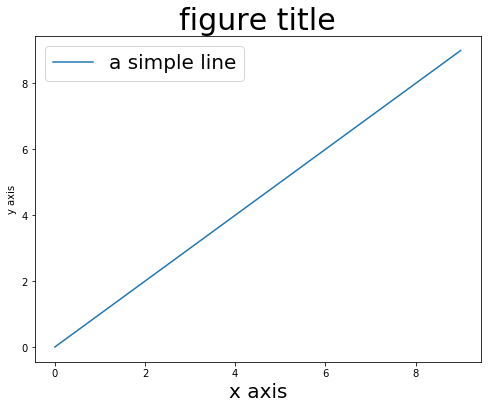

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

axes.plot(range(10))

axes.set_xlabel("x axis", fontsize=20)
axes.set_ylabel("y axis", fontsize=10)
axes.set_title("figure title", fontsize=30)

axes.legend(['a simple line'], fontsize=20)

plt.show()

### 1.4 轴刻度的设计

- 轴标题的设计   
相当于为x轴或者y轴的每一个刻度添加一个标题

- 轴标题大小/位置   
有时候用给定的轴标题绘制时，会特别的拥挤，存在轴标题重叠的现象，此时需要调整轴标题的大小以及位置

- 轴的范围   
默认轴的数值范围会根据绘制的数据自动来确定，有时候需要手动调整。

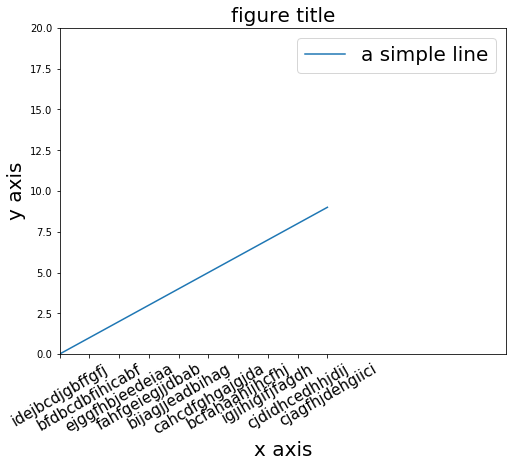

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

axes.plot(range(10), range(10))

# axes.set_xticks(range(10)) 
# axes.set_xticklabels(list("abcdefghij"))  
xtick_title = []
for _ in range(10):
    xtick_title.append("".join(np.random.choice(list("abcdefghij"), 15)))  # 随机生成轴标题

plt.xticks(range(10), xtick_title)  # 为x轴添加轴标题
plt.xticks(rotation=30, fontsize=15)  # 轴标题大小/位置

axes.set_xlim(0, 15)  # 设定x轴的显示范围
axes.set_ylim(0, 20)  # 设定y轴的显示范围


axes.set_xlabel("x axis", fontsize=20)
axes.set_ylabel("y axis", fontsize=20)
axes.set_title("figure title", fontsize=20)

axes.legend(['a simple line'], fontsize=20)

plt.show()

### 1.5 添加箭头和文字

有时候需要在图中添加特定的箭头和文字，`ax.annotate`的[官网API](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.annotate.html)

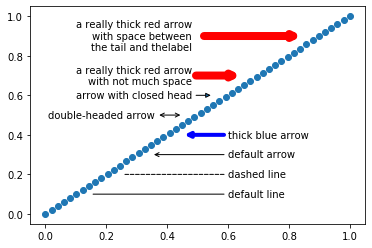

In [6]:
fig, ax = plt.subplots()
x = np.linspace(0,1)
ax.plot(x, x, 'o')

ax.annotate('default line', xy=(0.15,0.1), xytext=(0.6,0.1),
            arrowprops={'arrowstyle': '-'}, va='center')
ax.annotate('dashed line', xy=(0.25,0.2), xytext=(0.6,0.2),
            arrowprops={'arrowstyle': '-', 'ls': 'dashed'}, va='center')
ax.annotate('default arrow', xy=(0.35,0.3), xytext=(0.6,0.3),
            arrowprops={'arrowstyle': '->'}, va='center')
ax.annotate('thick blue arrow', xy=(0.45,0.4), xytext=(0.6,0.4),
            arrowprops={'arrowstyle': '->', 'lw': 4, 'color': 'blue'},
            va='center')
ax.annotate('double-headed arrow', xy=(0.45,0.5), xytext=(0.01,0.5),
            arrowprops={'arrowstyle': '<->'}, va='center')
ax.annotate('arrow with closed head', xy=(0.55,0.6), xytext=(0.1,0.6),
            arrowprops={'arrowstyle': '-|>'}, va='center')
ax.annotate('a really thick red arrow\nwith not much space', xy=(0.65,0.7),
            xytext=(0.1,0.7), va='center', multialignment='right',
            arrowprops={'arrowstyle': '-|>', 'lw': 8, 'ec': 'r'})
ax.annotate('a really thick red arrow\nwith space between\nthe tail and the'
            'label', xy=(0.85,0.9), xytext=(0.1,0.9), va='center',
            multialignment='right',
            arrowprops={'arrowstyle': '-|>', 'lw': 8, 'ec': 'r', 'shrinkA': 10})

plt.show()

### 1.6 中文字体的显示
默认的matplotlib不支持中文字体的显示，需要预先指定中文字体，目前有两种方式是测试通过的。

- 下载包`pyplotz`   
通过命令`pip install pyplotz`安装（整个包1M左右，不到1s可以安装完成），原理是通过其包里面带的中文字体来设置，具体使用参考下面代码，
其他有关该包的使用可以参考[链接](https://github.com/songlinhou/pyplotz/blob/master/examples/quick_start.ipynb)

- 自行下载中文字体   
下载完中文字体后，可以通过如下命令加载字体，后面的使用便和上面一致。

```
import matplotlib.font_manager as mfm

zh_font = mfm.FontProperties(fname="字体路径")
```

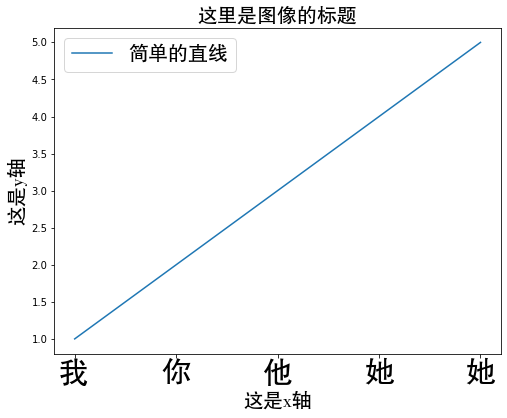

In [22]:
# 核心是实例化一个中文字体的对象，然后在绘图时指定该对象

from pyplotz.pyplotz import PyplotZ

pltz = PyplotZ()
pltz.enable_chinese()
zh_font = pltz.zh_font.copy()
zh_font.set_size(20)


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

x_val = [1, 2, 3, 4, 5]
y_val = [1, 2, 3, 4, 5]
axes.plot(x_val, y_val)

# 重新指定字体的大小
new_zh_font = pltz.zh_font.copy()
new_zh_font.set_size(30)

# 在x轴上绘制中文字符串
axes.set_xticks(x_val)
x_axis_label = ["我", "你", "他", "她", "她"]
axes.set_xticklabels(x_axis_label, fontproperties=new_zh_font)


axes.set_xlabel("这是x轴", fontproperties=zh_font)
axes.set_ylabel("这是y轴", fontproperties=zh_font)
axes.set_title("这里是图像的标题", fontproperties=zh_font)

axes.legend(['简单的直线'], prop=zh_font)

plt.show()

### 1.7 绘制多个子图

上面提到了在画布中可以初始化多个子图，下面具体展示为每个子图绘制不同的图形。

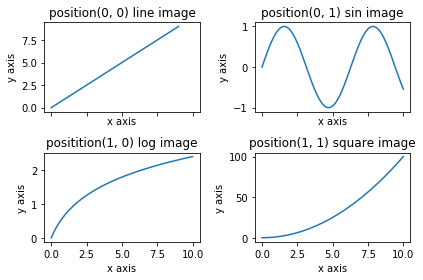

In [8]:
# 假设需要在一个图中绘制四个子图，排列方式为2×2

# 绘图
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True)

# 绘制第一幅子图
# first data plot scatter

axes[0, 0].plot(range(10))

axes[0, 0].set_xlabel("x axis")
axes[0, 0].set_ylabel("y axis")
axes[0, 0].set_title("position(0, 0) line image")

# 绘制第二幅子图
# second data plot line
data2_x = np.linspace(0, 10, 500)
data2_y = np.sin(data2_x)

axes[0, 1].plot(data2_x, data2_y)

axes[0, 1].set_xlabel("x axis")
axes[0, 1].set_ylabel("y axis")
axes[0, 1].set_title("position(0, 1) sin image")


# 绘制第三幅图
# third data plot bar
data3_x = np.linspace(0, 10, 500)
data3_y = np.log1p(data2_x)

axes[1, 0].plot(data3_x, data3_y)

axes[1, 0].set_xlabel("x axis")
axes[1, 0].set_ylabel("y axis")
axes[1, 0].set_title("positition(1, 0) log image")


# 绘制第四幅图
# fourth data plot pie
data4_x = np.linspace(0, 10, 500)
data4_y = (data2_x) **2 

axes[1, 1].plot(data4_x, data4_y)


axes[1, 1].set_xlabel("x axis")
axes[1, 1].set_ylabel("y axis")
axes[1, 1].set_title("position(1, 1) square image")

plt.tight_layout()
plt.show()

### 1.8 不同的量度的绘制

绝大多数的图中绘制都是使用同一个量度在图的左侧显示，有时候需要两个量度，将其显示在图的右侧

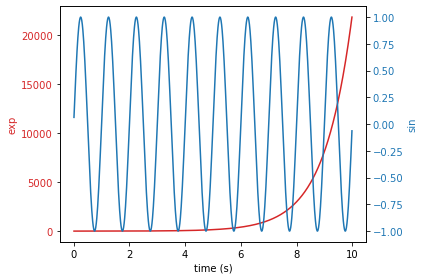

In [9]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## 2. 常用的绘图

### 2.1 散点图
散点图也叫 X-Y 图，它将所有的数据以点的形式展现在直角坐标系上，以显示变量之间的相互影响程度，点的位置由变量的数值决定。
下面绘图方式主要通过`matplotlib.axes.Axes.scatter`方式，详细API和更多demo示例参考[官方API](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.scatter.html)

#### 2.1.1 单组散点图
单组散点图只有一组x和一组y，往往通过散点图来查看x和y的关系。

show data:
x axis: [0.5181273  0.4481044  0.42808005 0.95050569 0.09395119 0.56788234
 0.31396658 0.76838477 0.94340523 0.4135737 ]
y axis: [0.636344   0.63772251 0.36090128 0.22181367 0.32716452 0.05870755
 0.51629851 0.4261541  0.03275928 0.01765715]


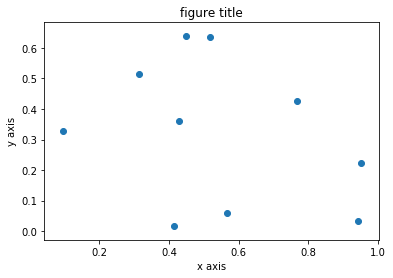

In [10]:
# create needed data
N = 10
x = np.random.rand(N)
y = np.random.rand(N)

print("show data:")
print("x axis:", x)
print("y axis:", y)


# 绘图
fig, ax = plt.subplots()  # 创建画布
ax.scatter(x, y)  # 绘图

ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_title("figure title")

plt.show()

#### 2.1.2 多组散点图

将多组不同的 X-Y 对绘制于同一个figure中，用于查看多组X-Y的不同趋势。

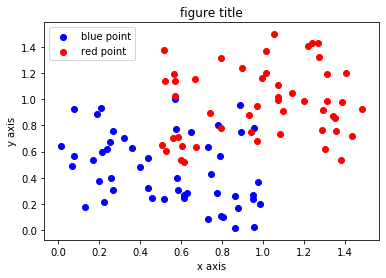

In [11]:
# create data
N = 50

x1 = np.random.rand(N)
y1 = np.random.rand(N)

x2 = np.random.rand(N) + 0.5
y2 = np.random.rand(N) + 0.5

# plot
fig, ax = plt.subplots()

ax.scatter(x1, y1, c="blue", label="blue point")
ax.scatter(x2, y2, c="red", label="red point")

ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_title("figure title")

ax.legend()

plt.show()

#### 2.1.3 气泡图

气泡图是散点图的一种变形，因为普通的散点图往往展示的X-Y这组pair的数据，有时候需要显示X-Y-Z这种关系，此时可以通过散点图的大小来显示Z这组变量，即气泡图。

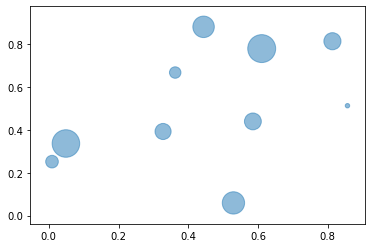

In [22]:
N = 10

x = np.random.rand(N)
y = np.random.rand(N)

z = (30 * np.random.rand(N))**2  # 气泡的半径的大小

plt.scatter(x, y, s=z, alpha=0.5)

ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_title("figure title")


plt.show()

### 2.2 折线图
下面绘图的核心使用的为`matplotlib.axes.Axes.plot`，详细的使用API以及demo参考[官方API](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.plot.html)。

#### 2.2.1 单组折线图

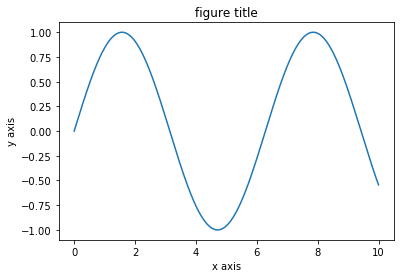

In [12]:
# create data
x = np.linspace(0, 10, 500)
y = np.sin(x)

fig, ax = plt.subplots()

ax.plot(x, y)

ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_title("figure title")

plt.show()

#### 2.2.2 多组折线图

其中每个线条的样式可以由第三个参数的字符串控制，其可以表示为三部分'[marker][line][color]'

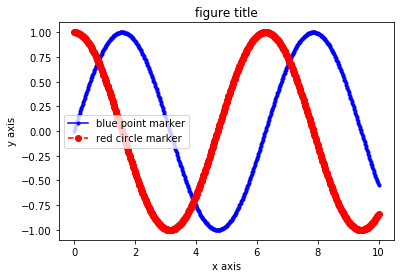

In [13]:
# create data
x = np.linspace(0, 10, 500)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots()

ax.plot(x, y1, ".-b", label="blue point marker")  # 
ax.plot(x, y2, "o--r", label="red circle marker")

ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_title("figure title")

ax.legend()

plt.show()

### 2.3 柱状图

下面绘图的核心使用的为`matplotlib.axes.Axes.bar`（纵向柱状图）和`matplotlib.axes.Axes.barh`（横向柱状图），
- 纵向柱状图的详细使用API以及demo参考[官方API](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.bar.html)。
- 横向柱状图的详细使用API以及demo参考[官方API](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.barh.html)

#### 2.3.1 单柱状图
相当于每个x轴的刻度对应一个柱子

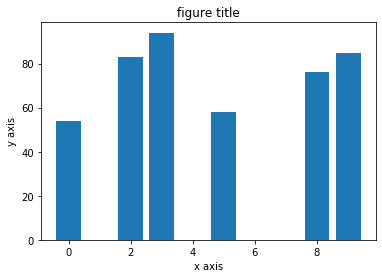

In [14]:
# create data

x = np.random.choice(range(10), 6, replace=False)
y = np.random.choice(range(50, 100), 6)

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_title("figure title")

plt.show()

#### 2.3.2 多组柱状图
相当于每个x轴的刻度对应多个柱子

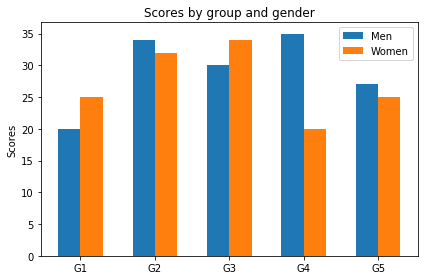

In [15]:
# create data

labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')

# 为x轴添加字符串注释
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

#### 2.3.3 横向柱状图
相当于单柱状图的x轴和y轴相互颠倒。

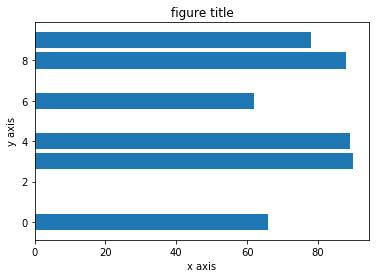

In [16]:
# create data

x = np.random.choice(range(10), 6, replace=False)
y = np.random.choice(range(50, 100), 6)

fig, ax = plt.subplots()

ax.barh(x, y)

ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_title("figure title")

plt.show()

#### 2.3.4 堆叠的柱状图
不同组的数据在同一个柱上展示

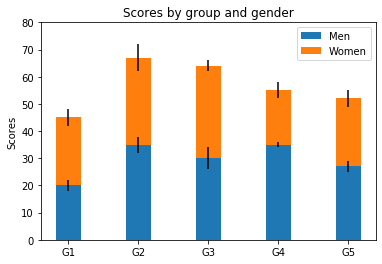

In [17]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, menMeans, width, yerr=menStd)
p2 = ax.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')

plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))  # 添加x轴刻度的标题
plt.yticks(np.arange(0, 81, 10))  # 添加y轴刻度的标题

ax.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

### 2.4 饼图
下面绘图的核心使用的为`matplotlib.axes.Axes.pie`，详细的使用API以及demo参考[官方API](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.pie.html)。

#### 2.4.1 基本饼图

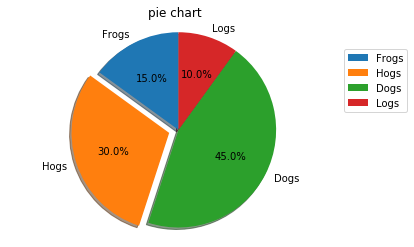

In [18]:
# create data
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # 相当于只将第二组的部分弹出

fig, ax = plt.subplots()

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)

ax.axis('equal')  # 使整体的绘制均匀，即绘制的是一个圆形，而不是椭圆

ax.set_title("pie chart")
ax.legend(loc=2, bbox_to_anchor=(0.99, 0.9))

plt.show()

#### 2.4.2 多个饼图的绘制

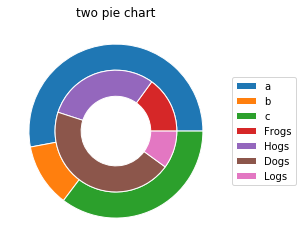

In [19]:
fig, ax = plt.subplots()

size = 0.3

label1 = ["a", "b", "c"]
data1 = [90, 20, 60]

label2 = ['Frogs', 'Hogs', 'Dogs', 'Logs']
data2 = [15, 30, 45, 10]

wedges1, _ = ax.pie(data1, radius=1,
                       wedgeprops=dict(width=size, edgecolor='w'))

wedges2, _ = ax.pie(data2, radius=1-size,
                       wedgeprops=dict(width=size, edgecolor='w'))

ax.legend(wedges1+wedges2,label1+label2, loc="center right", bbox_to_anchor=(1, 0, 0.35, 1))

ax.set(aspect="equal", title='two pie chart')

plt.show()

### 2.5 直方图
[直方图](https://baike.baidu.com/item/%E7%9B%B4%E6%96%B9%E5%9B%BE/1103834)(Histogram)，又称质量分布图，是一种统计报告图，由一系列高度不等的纵向条纹或线段表示数据分布的情况。 一般用横轴表示数据类型，纵轴表示分布情况。   

下面绘图的核心使用的为`matplotlib.axes.Axes.hist`，详细的使用API以及demo参考[官方API](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.hist.html)。

#### 2.5.1 基本直方图

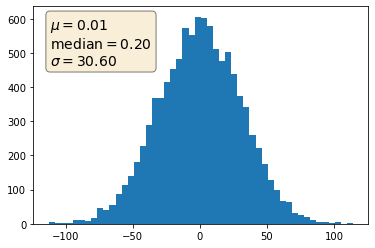

In [20]:
x = 30*np.random.randn(10000)

mu = x.mean()
median = np.median(x)
sigma = x.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\mathrm{median}=%.2f$' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))


fig, ax = plt.subplots()

ax.hist(x, bins=50)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.show()

#### 2.5.2 多组直方图的绘制

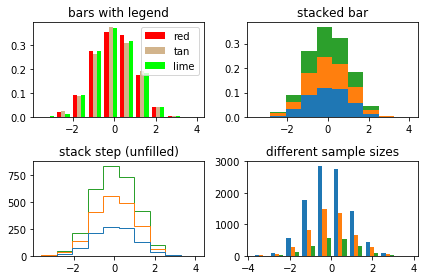

In [21]:
np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

### 2.6 直线
直线在绘图中也是经常使用到的，主要是竖线和水平线

#### 2.6.1 水平直线
绘制的方法为`matplotlib.axes.Axes.hlines`,[官网API](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.hlines.html)

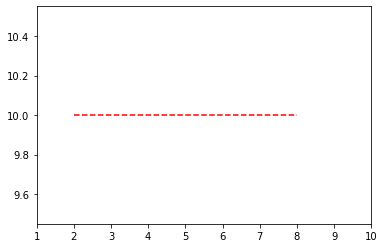

In [22]:

fig, ax = plt.subplots()

ax.hlines(10, 2, 8, colors="red", linestyles="--")  # 在区间[2, 8]绘制一条水平的虚线

ax.set_xlim(1, 10)

plt.show()

#### 2.6.2 竖直直线
绘制的方法为`matplotlib.axes.Axes.vlines`，[官网API](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.vlines.html)

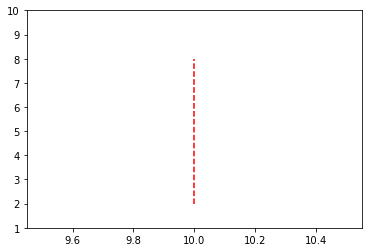

In [23]:
fig, ax = plt.subplots()

ax.vlines(10, 2, 8, colors="red", linestyles="--")  # 在区间[2, 8]绘制一条水平的虚线

ax.set_ylim(1, 10)

plt.show()

### 2.7 箱形图

[箱形图](https://baike.baidu.com/item/%E7%AE%B1%E5%BD%A2%E5%9B%BE)（Box-plot）又称为盒须图、盒式图或箱线图，是一种用作显示一组数据分散情况资料的统计图。因形状如箱子而得名。  

下面绘图的核心使用的为`matplotlib.axes.Axes.boxplot`，详细的使用API以及demo参考[官方API](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)。

#### 2.7.1 基本箱形图

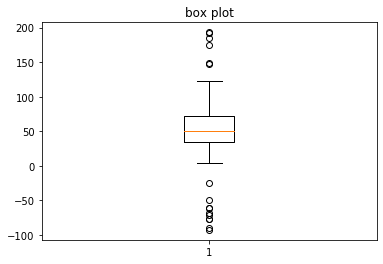

In [3]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))


fig, ax = plt.subplots()

ax.boxplot(data)

ax.set_title('box plot')

plt.show()

#### 2.7.2 水平箱形图

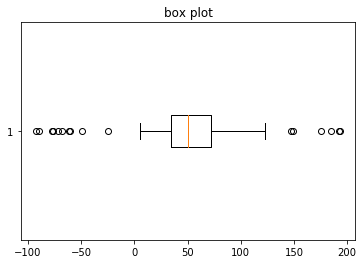

In [4]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))


fig, ax = plt.subplots()

ax.boxplot(data, vert=False)

ax.set_title('box plot')

plt.show()

#### 2.7.3 多组箱形图

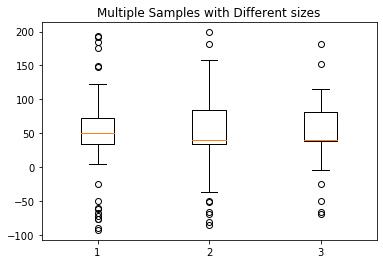

In [5]:
# create data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))
data.shape = (-1, 1)
d2.shape = (-1, 1)

data = [data, d2, d2[::2,0]]
fig, ax = plt.subplots()
ax.set_title('Multiple Samples with Different sizes')
ax.boxplot(data)

plt.show()